In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
from datetime import timedelta

In [22]:
sp500_tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]


In [23]:
def get_stock_data(tickers, start, end):
    all_data = []
    for i in range(0, len(tickers), 50):  # Download data in chunks of 50 tickers to avoid overloading
        tickers_chunk = tickers[i:i+50]
        data = yf.download(tickers_chunk, start=start, end=end)
        all_data.append(data['Close'])
    return pd.concat(all_data, axis=1)

In [29]:
# Parameters
time_range = 1  # Number of years back from today

# Get today's date
end_date = datetime.datetime.today()

# Calculate the start date based on time_range
start_date = end_date - timedelta(days=time_range*365)

# Format dates as strings
end_date_str = end_date.strftime('%Y-%m-%d')
start_date_str = start_date.strftime('%Y-%m-%d')

# Get the list of ticker symbols as a list
tickers = sp500_tickers['Symbol'].tolist()

# Get historical data for S&P 500 constituents
data = get_stock_data(tickers, start_date_str, end_date_str)

[*********************100%%**********************]  50 of 50 completed
[*********************100%%**********************]  50 of 50 completed

2 Failed downloads:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-07-20 -> 2024-07-19)')
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  50 of 50 completed
[*********************100%%**********************]  50 of 50 completed
[*********************100%%**********************]  50 of 50 completed
[*********************100%%**********************]  50 of 50 completed
[*********************100%%**********************]  50 of 50 completed
[*********************100%%**********************]  50 of 50 completed
[*********************100%%**********************]  50 of 50 completed
[*********************100%%**********************]  50 of 50 completed
[*********************100%%**********************]  3 of 3 completed


In [30]:
data.head()

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WST,WTW,WY,WYNN,XEL,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-07-20,124.550003,17.440001,193.130005,142.190002,145.279999,111.830002,81.500000,312.470001,516.880005,189.649994,...,378.750000,232.110001,34.330002,106.190002,64.559998,113.550003,135.880005,142.729996,304.540009,171.610001
2023-07-21,127.620003,17.420000,191.940002,143.740005,148.770004,114.290001,82.269997,314.799988,520.229980,191.960007,...,377.320007,233.589996,34.380001,107.180000,65.209999,113.769997,137.539993,142.229996,306.459991,183.509995
2023-07-24,127.720001,16.879999,192.750000,143.179993,147.619995,114.620003,81.190002,313.290009,523.859985,192.369995,...,376.059998,232.250000,34.290001,107.510002,65.080002,113.959999,137.940002,140.869995,302.589996,185.580002
2023-07-25,127.309998,16.650000,193.619995,141.630005,148.649994,112.930000,81.360001,317.589996,525.340027,195.660004,...,377.130005,233.000000,34.380001,108.839996,64.959999,114.349998,136.990005,140.300003,301.429993,190.149994
2023-07-26,128.470001,16.760000,194.500000,141.899994,150.169998,114.080002,82.080002,316.510010,514.549988,191.520004,...,379.420013,232.929993,34.380001,109.529999,65.050003,113.830002,137.300003,141.820007,306.119995,192.000000


In [33]:
# Function to calculate the Advance-Decline Line
def calculate_ad_line(data):
    # Calculate daily advances and declines
    daily_changes = data.diff()
    advances = (daily_changes > 0).sum(axis=1)
    declines = (daily_changes < 0).sum(axis=1)
    
    # Calculate net advances
    net_advances = advances - declines
    
    # Calculate the AD Line
    ad_line = net_advances.cumsum()
    
    return ad_line

# Function to plot the Advance-Decline Line and S&P 500 index
def plot_ad_line_and_sp500(ad_line, sp500):
    fig, ax1 = plt.subplots(figsize=(14, 7))
    
    ax1.set_xlabel('Date')
    ax1.set_ylabel('S&P 500 Index', color='tab:blue')
    ax1.plot(sp500.index, sp500, label='S&P 500 Index', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.legend(loc='upper left')
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('Advance-Decline Line', color='tab:orange')  # we already handled the x-label with ax1
    ax2.plot(ad_line.index, ad_line, label='Advance-Decline Line', color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')
    ax2.legend(loc='upper right')
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title('S&P 500 Index and Advance-Decline Line')
    plt.grid(True)
    plt.show()

[*********************100%%**********************]  1 of 1 completed


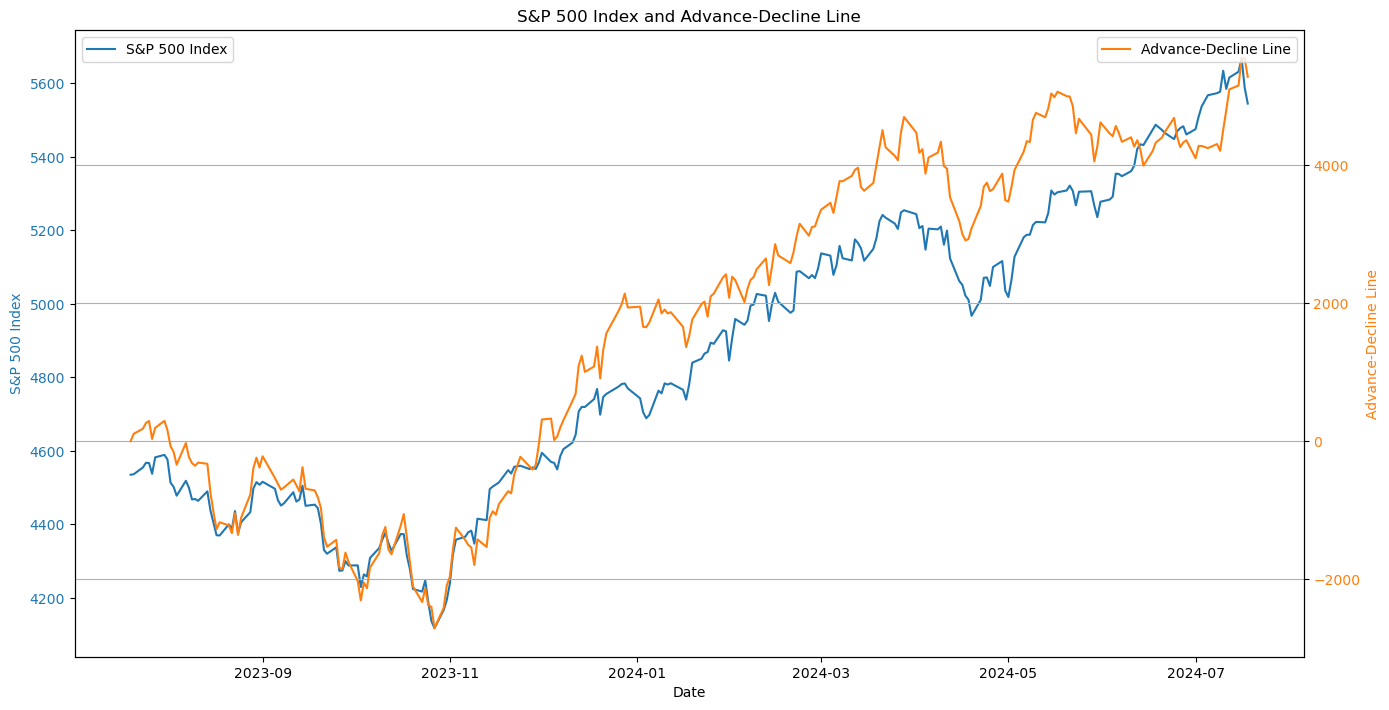

In [36]:
# Calculate the AD Line
ad_line = calculate_ad_line(data)

sp500 = yf.download('^GSPC', start=start_date_str, end=end_date_str)['Close']

# Plot the AD Line
plot_ad_line_and_sp500(ad_line, sp500)